In [1]:
# Importamos las librerías para trabajar con DFS(Depth-First Search)
# Búsqueda en profundidad

import networkx as nx
import matplotlib.pyplot as plt

In [22]:
def dfs(grafo, inicio, objetivo, visitados=None, camino=None, caminos_encontrados=None, i=0):
    i += 1
    print("\nNivel de profundidad:", i)
    
    # Si entramos a este método por primera vez 
    if visitados is None:
        visitados = set()
    if camino is None:
        camino = []
    if caminos_encontrados is None:
        caminos_encontrados = []

    camino.append(inicio)
    visitados.add(inicio)

    print("Nodo actual:", inicio)
    print("Nodos visitados", visitados)
    print("Camino Actual:", camino)

    if inicio == objetivo:
        print("Camino encontrado:", ' -> '.join(camino))
        caminos_encontrados.append(camino.copy())
    else:
        for vecino in grafo[inicio]:
            if vecino not in visitados:
                dfs(grafo, vecino, objetivo, visitados, camino, caminos_encontrados, i)

    camino.pop()  # Eliminamos el último nodo para retroceder al nodo anterior
    visitados.remove(inicio)

    return caminos_encontrados

# Definimos el grafo como un diccionario de listas de adyacencia
grafo = {
    'A': ['B', 'F'],
    'B': ['A', 'C', 'D'],
    'C': ['B'],
    'D': ['B', 'E', 'F'],
    'E': ['D'],
    'F': ['A', 'D']
}

# Nodo de inicio y nodo objetivo
nodo_inicio = 'A'
nodo_objetivo = 'E'

print("Recorrido DFS:")
caminos_encontrados = dfs(grafo, nodo_inicio, nodo_objetivo)

if caminos_encontrados:
    print("Caminos encontrados:")
    for camino in caminos_encontrados:
        print(' -> '.join(camino))
else:
    print("No se encontró un camino al nodo objetivo.")


Recorrido DFS:

Nivel de profundidad: 1
Nodo actual: A
Nodos visitados {'A'}
Camino Actual: ['A']

Nivel de profundidad: 2
Nodo actual: B
Nodos visitados {'A', 'B'}
Camino Actual: ['A', 'B']

Nivel de profundidad: 3
Nodo actual: C
Nodos visitados {'A', 'B', 'C'}
Camino Actual: ['A', 'B', 'C']

Nivel de profundidad: 3
Nodo actual: D
Nodos visitados {'A', 'B', 'D'}
Camino Actual: ['A', 'B', 'D']

Nivel de profundidad: 4
Nodo actual: E
Nodos visitados {'A', 'B', 'D', 'E'}
Camino Actual: ['A', 'B', 'D', 'E']
Camino encontrado: A -> B -> D -> E

Nivel de profundidad: 4
Nodo actual: F
Nodos visitados {'F', 'B', 'A', 'D'}
Camino Actual: ['A', 'B', 'D', 'F']

Nivel de profundidad: 2
Nodo actual: F
Nodos visitados {'F', 'A'}
Camino Actual: ['A', 'F']

Nivel de profundidad: 3
Nodo actual: D
Nodos visitados {'F', 'A', 'D'}
Camino Actual: ['A', 'F', 'D']

Nivel de profundidad: 4
Nodo actual: B
Nodos visitados {'F', 'B', 'A', 'D'}
Camino Actual: ['A', 'F', 'D', 'B']

Nivel de profundidad: 5
Nodo ac

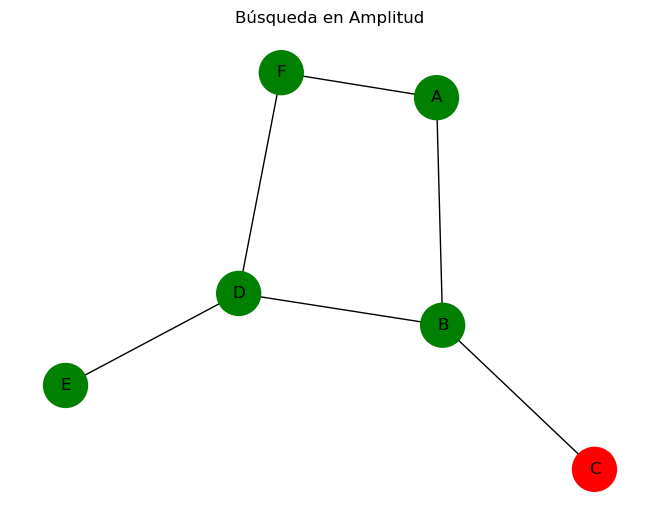

In [27]:
# Creamos el gráfico
G = nx.Graph(grafo)

# Coloreamos los nodos según si están en algún camino o no
colores = []
for nodo in G.nodes():
    en_camino = False
    for camino in caminos_encontrados:
        if nodo in camino:
            en_camino = True
            break
    if en_camino:
        colores.append('green')
    else:
        colores.append('red')

# Dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=colores, node_size=1000)
plt.title("Búsqueda en Amplitud")
plt.show()